In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
directory = '/content/drive/MyDrive/학교/공모전/국토교통부공모전/AptEnergy/'

file_list = os.listdir(directory)
month_list = ['202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212']
file_to_remove = '.ipynb_checkpoints'
file_list.remove(file_to_remove)
print(file_list)

['Seongdong_Gu_Only', 'Jungang_Gu_Only', 'Jung_Gu_Only', 'Gangseo_Gu_Only', 'Mapo_Gu_Only', 'Gangnam_Gu_Only', 'Geumcheon_Gu_Only', 'Songpa_Gu_Only', 'Yeongdeungpo_Gu_Only', 'Nowon_Gu_Only', 'Guro_Gu_Only', 'Jongno_Gu_Only', 'Seodaemun_Gu_Only', 'Seocho_Gu_Only', 'Gwangjin_Gu_Only', 'Gwanak_Gu_Only', 'Yangcheon_Gu_Only', 'Yongsan_Gu_Only', 'Dobong_Gu_Only', 'Dongdaemun_Gu_Only', 'Dongjak_Gu_Only', 'Eunpyeong_Gu_Only', 'Gangdong_Gu_Only', 'Gangbuk_Gu_Only']


In [5]:
def process_data(city, month_list):
    pd_data = {}  # Empty dictionary to store DataFrames

    for month in month_list:
        pd_data[month] = pd.read_csv(f'/content/drive/MyDrive/학교/공모전/국토교통부공모전/AptEnergy/{city}/{month}.csv')

    # Concatenate the DataFrames
    data_year = pd.concat(pd_data.values())

    # Reset the index
    data_year.reset_index(drop=True, inplace=True)

    # Drop specified columns
    data_year = data_year.drop(labels=['heatC', 'heatP', 'gasC', 'gasP', 'waterHotC', 'waterHotP'], axis=1)

    # NaN 제거
    data_year = data_year.dropna()

    # 절댓값
    data_year['electC'] = data_year['electC'].abs()
    data_year['electP'] = data_year['electP'].abs()
    data_year['waterCoolC'] = data_year['waterCoolC'].abs()

    return data_year

도봉구_data = process_data("Dobong_Gu_Only", month_list)
동대문구_data = process_data("Dongdaemun_Gu_Only", month_list)
동작구_data = process_data("Dongjak_Gu_Only", month_list)
은평구_data = process_data("Eunpyeong_Gu_Only", month_list)
강북구_data = process_data("Gangbuk_Gu_Only", month_list)
강동구_data = process_data("Gangdong_Gu_Only", month_list)
강남구_data = process_data("Gangnam_Gu_Only", month_list)
강서구_data = process_data("Gangseo_Gu_Only", month_list)
금천구_data = process_data("Geumcheon_Gu_Only", month_list)
구로구_data = process_data("Guro_Gu_Only", month_list)
관악구_data = process_data("Gwanak_Gu_Only", month_list)
광진구_data = process_data("Gwangjin_Gu_Only", month_list)
종로구_data = process_data("Jongno_Gu_Only", month_list)
중구_data = process_data("Jung_Gu_Only", month_list)
중랑구_data = process_data("Jungang_Gu_Only", month_list)
마포구_data = process_data("Mapo_Gu_Only", month_list)
노원구_data = process_data("Nowon_Gu_Only", month_list)
서초구_data = process_data("Seocho_Gu_Only", month_list)
서대문구_data = process_data("Seodaemun_Gu_Only", month_list)
성동구_data = process_data("Seongdong_Gu_Only", month_list)
송파구_data = process_data("Songpa_Gu_Only", month_list)
양천구_data = process_data("Yangcheon_Gu_Only", month_list)
영등포구_data = process_data("Yeongdeungpo_Gu_Only", month_list)
용산구_data = process_data("Yongsan_Gu_Only", month_list)


<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


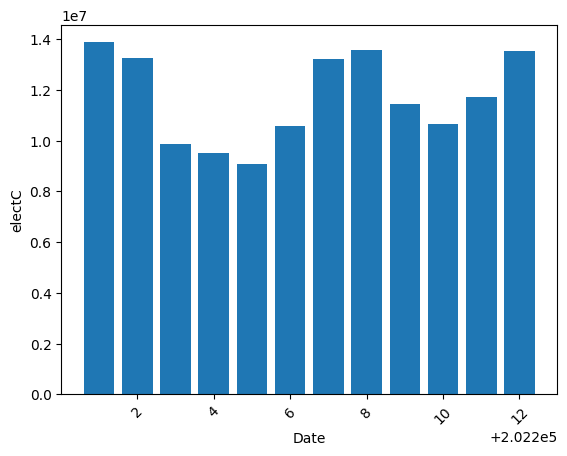

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


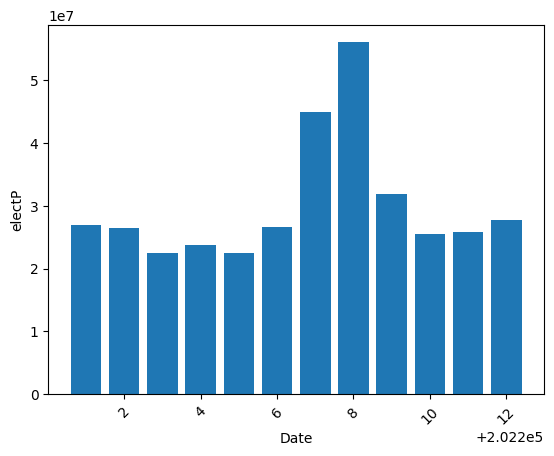

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


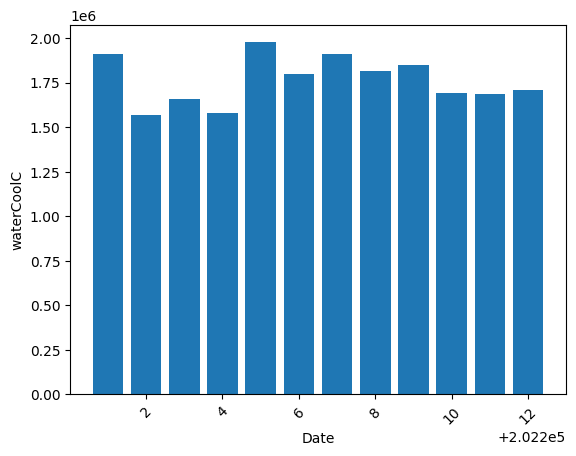

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


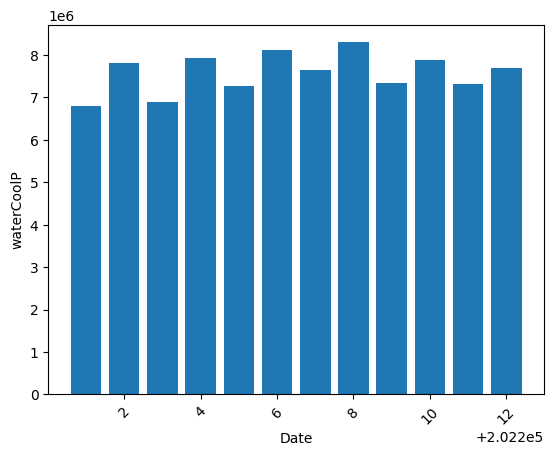

In [6]:
def plot_mean_by_date(data, column):
    mean_by_date = data.groupby('Date').mean()

    dates = mean_by_date.index
    mean_values = mean_by_date[column]

    plt.bar(dates, mean_values)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()

# Example usage
plot_mean_by_date(용산구_data, 'electC')
plot_mean_by_date(용산구_data, 'electP')
plot_mean_by_date(용산구_data, 'waterCoolC')
plot_mean_by_date(용산구_data, 'waterCoolP')

In [7]:
용산구_data

,Unnamed: 0,kaptCode,electC,electP,waterCoolC,waterCoolP,Date
0,0,A14019001,765140.00000,5389550.00000,0.00000,0.00000,202201.00000
1,1,A14070302,25737810.00000,37034870.00000,610330.00000,7643480.00000,202201.00000
3,3,A14006001,1828149.00000,8693400.00000,0.00000,3470800.00000,202201.00000
4,4,A14004001,1270380.00000,9495610.00000,0.00000,0.00000,202201.00000
5,5,A14004002,11670128.00000,43315470.00000,0.00000,0.00000,202201.00000
...,...,...,...,...,...,...,...
677,50,A10025192,46512970.00000,80675130.00000,3570300.00000,7272410.00000,202212.00000
680,53,A14024001,5987270.00000,9619790.00000,0.00000,0.00000,202212.00000
681,54,A14024002,37545970.00000,68647750.00000,13245275.00000,0.00000,202212.00000
682,55,A14082601,2369250.00000,8171330.00000,423830.00000,3849130.00000,202212.00000


In [8]:
용산구_data.mean()

<ipython-input-8-b2b185acf883>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  용산구_data.mean()


Unnamed: 0         26.69479
electC       11692067.36984
electP       30082346.56912
waterCoolC    1762987.66607
waterCoolP    7583664.67864
Date           202206.55296
dtype: float64

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


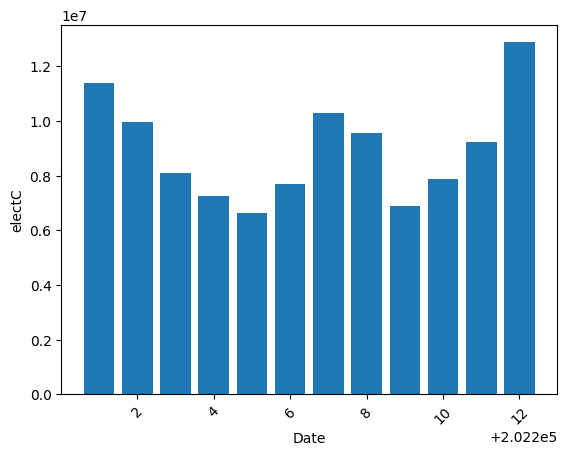

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


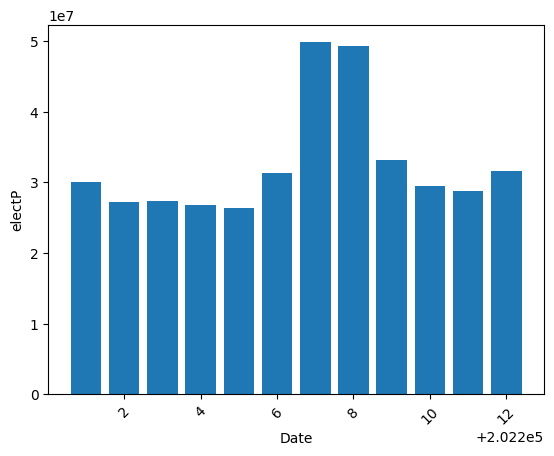

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


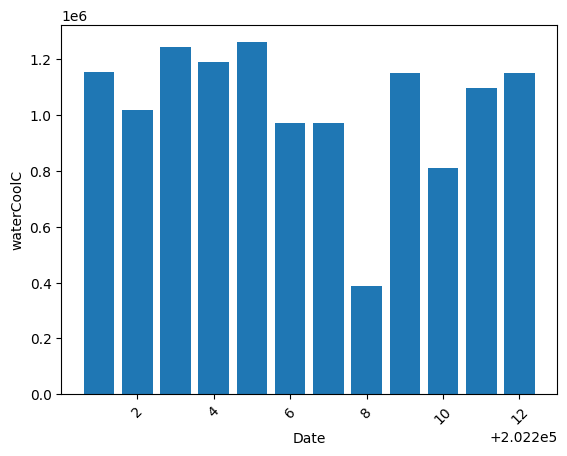

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


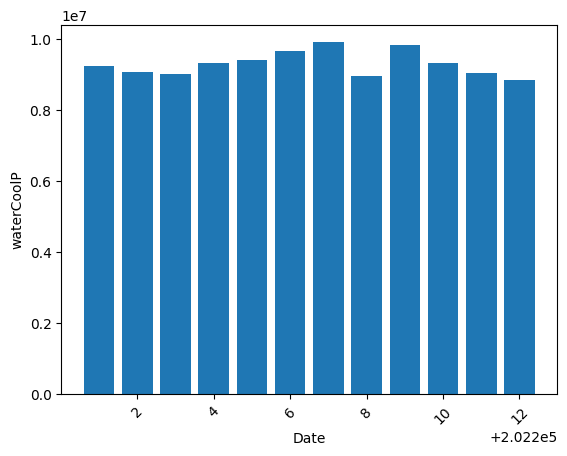

In [9]:
plot_mean_by_date(강남구_data, 'electC')
plot_mean_by_date(강남구_data, 'electP')
plot_mean_by_date(강남구_data, 'waterCoolC')
plot_mean_by_date(강남구_data, 'waterCoolP')

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


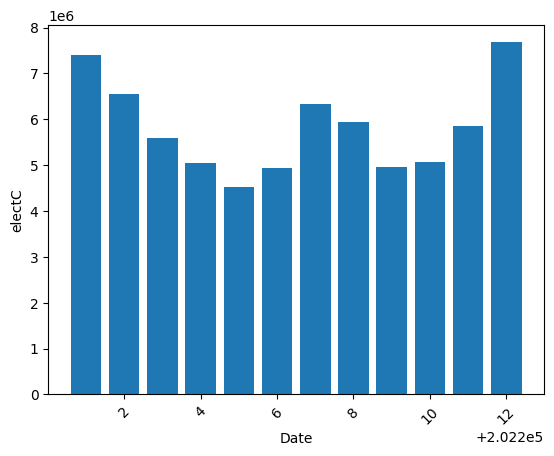

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


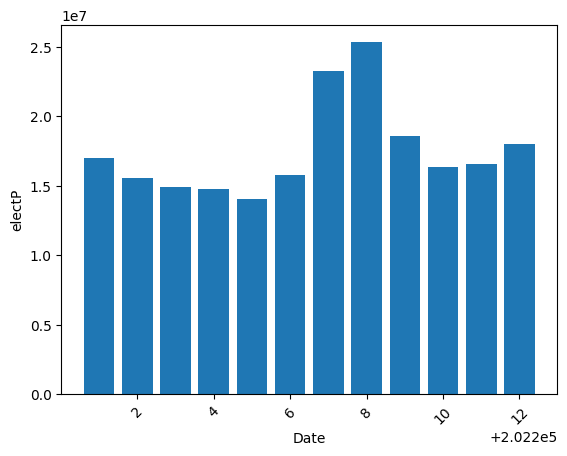

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


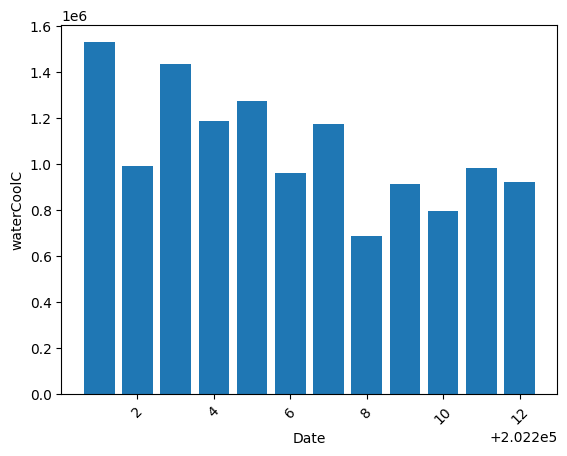

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


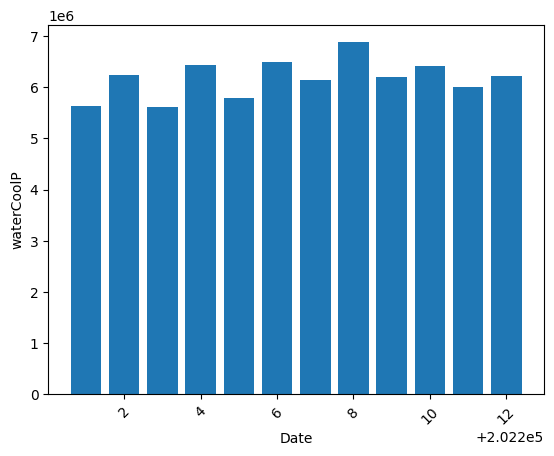

In [10]:
plot_mean_by_date(강서구_data, 'electC')
plot_mean_by_date(강서구_data, 'electP')
plot_mean_by_date(강서구_data, 'waterCoolC')
plot_mean_by_date(강서구_data, 'waterCoolP')

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


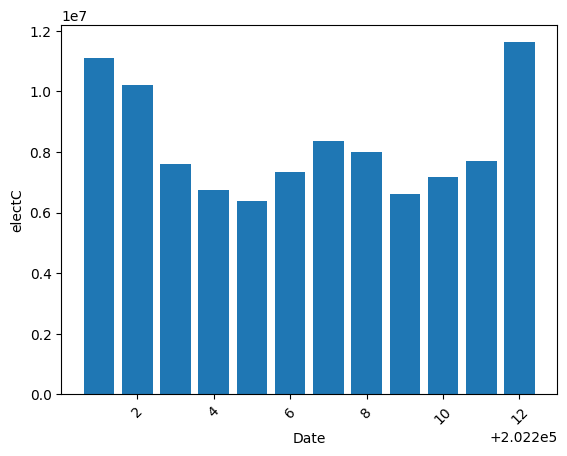

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


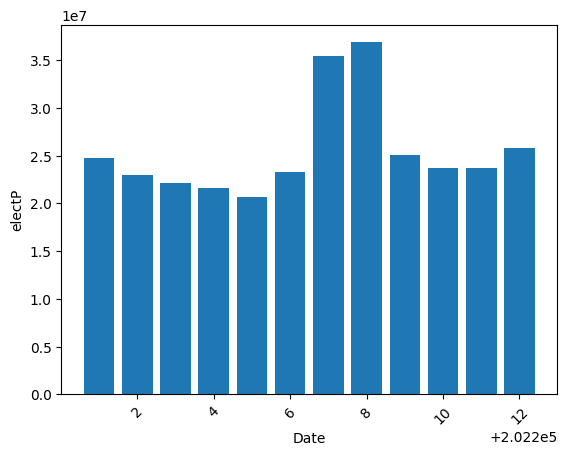

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


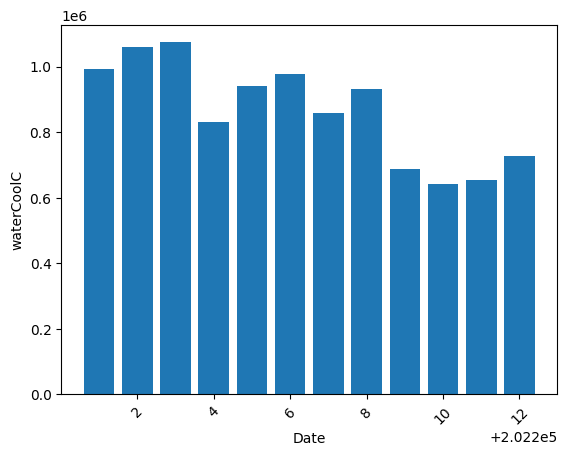

<ipython-input-6-9bb6f5ecfa8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_date = data.groupby('Date').mean()


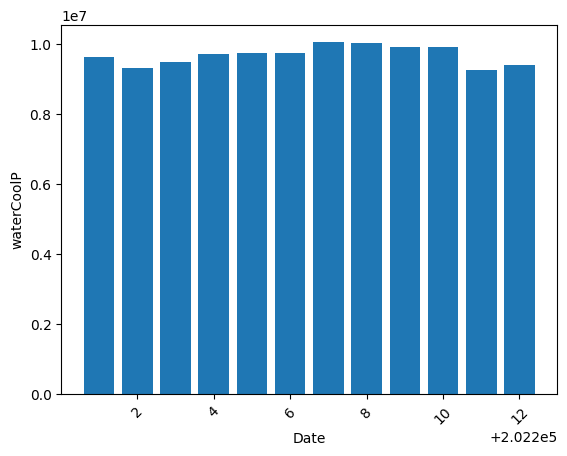

In [52]:
plot_mean_by_date(서대문구_data, 'electC')
plot_mean_by_date(서대문구_data, 'electP')
plot_mean_by_date(서대문구_data, 'waterCoolC')
plot_mean_by_date(서대문구_data, 'waterCoolP')

In [38]:
seoul_data = [도봉구_data, 동대문구_data, 동작구_data, 은평구_data, 강북구_data, 강동구_data, 강남구_data, 강서구_data, 금천구_data, 구로구_data, 관악구_data, 광진구_data, 종로구_data, 중구_data, 중랑구_data, 마포구_data, 노원구_data, 서초구_data, 서대문구_data, 성동구_data, 송파구_data, 양천구_data, 영등포구_data, 용산구_data]
seoul_name = ['Dobong', 'Dongdaemun', 'Dongjak', 'Eunpyeong', 'Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo','Geumcheon', 'Guro', 'Gwanak', 'Gwangjin', 'Jongro', 'Junggu', 'Jungrang', 'Mapo', 'Nowon', 'Seocho', 'Seodaemun', 'Seodaemun', 'Songpa', 'Yangcheon', 'Yeongdungpo', 'Yonsan']

electC_mean = []
electP_mean = []
waterCoolC_mean = []
waterCoolP_mean = []

for i in range(len(seoul_data)):
  electC_mean.append(seoul_data[i]['electC'].mean())
  electP_mean.append(seoul_data[i]['electP'].mean())
  waterCoolC_mean.append(seoul_data[i]['waterCoolC'].mean())
##  waterCoolP_mean.append(seoul_data[i]['waterCoolP'].mean()) 자꾸 에러뜸

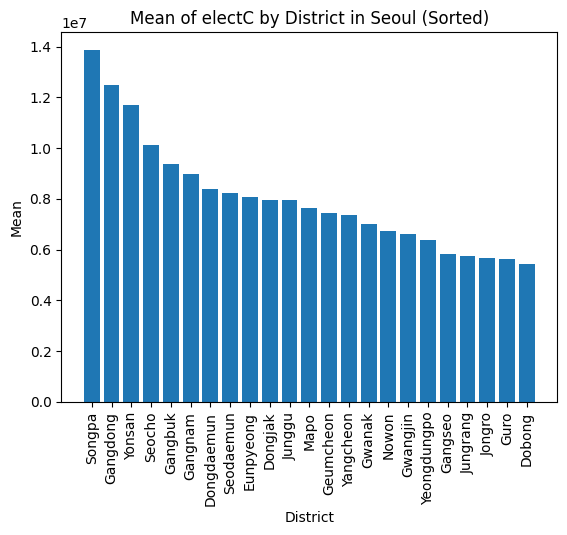

In [49]:
seoul_electC_data = {
    'District': seoul_name,
    'Mean': electC_mean
}

seoul_electC_table = pd.DataFrame(seoul_electC_data)

seoul_electC_table_sorted = seoul_electC_table.sort_values('Mean', ascending=False)

plt.bar(seoul_electC_table_sorted['District'], seoul_electC_table_sorted['Mean'])

# Set the labels and title
plt.xlabel('District')
plt.ylabel('Mean')
plt.title('Mean of electC by District in Seoul (Sorted)')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()


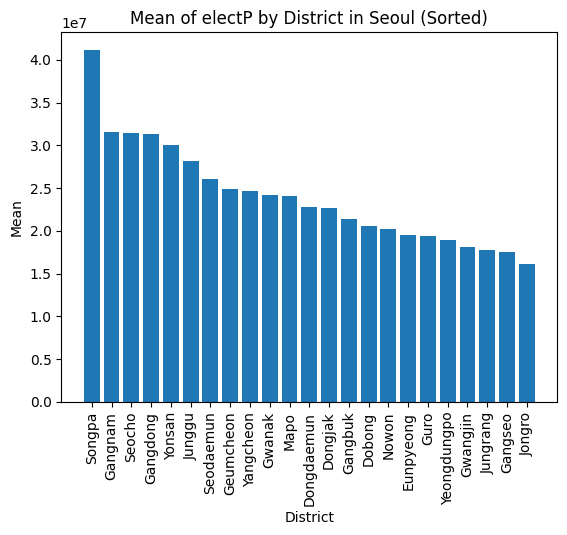

In [50]:
seoul_electP_data = {
    'District': seoul_name,
    'Mean': electP_mean
}

seoul_electP_table = pd.DataFrame(seoul_electP_data)

seoul_electP_table_sorted = seoul_electP_table.sort_values('Mean', ascending=False)

plt.bar(seoul_electP_table_sorted['District'], seoul_electP_table_sorted['Mean'])

# Set the labels and title
plt.xlabel('District')
plt.ylabel('Mean')
plt.title('Mean of electP by District in Seoul (Sorted)')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()